<a href="https://colab.research.google.com/github/PrathameshBagal/Data-Science/blob/main/cse519_hw2_Bagal_Prathamesh_115612879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519

/content/drive/MyDrive/cse519


# Download data from Kaggle

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle (11).json


{'kaggle (11).json': b'{"username":"prathameshbagal2908","key":"7c39bd28bf8ec01c18c560e841a8e860"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)


# Alternate: download data using gdown (if having issues with Kaggle)

In [ ]:
# !pip install gdown

In [ ]:
# import gdown
# url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
# gdown.download(url)

# Extract data and install packages (regardless of data acquisition method)

In [8]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [10]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [11]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

# Reading both the csv files and storing them temporarily
prompts_train = pd.read_csv("prompts_train.csv")
summaries_train= pd.read_csv("summaries_train.csv")

#  Merging both of them on prompt_id to make df structure as that of use_cols


In [12]:
prompts_train

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [13]:
summaries_train

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


Joining the summaries_train and prompts_train as per Q1

In [14]:
df = summaries_train.merge(prompts_train,on="prompt_id")
df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


In [15]:
#  Removing special characters from the prompt_text
df["prompt_text"]= df["prompt_text"].str.replace("\W"," ", regex=True)
df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In Question 2, we are supposed to build a dataframe of 7 features from the text in the summaries_train and prompts_train. I have made the entire table under the name task2Table in the same cell. I have explained each step with the help of comments wherever necessary.

In [16]:
task2Table= pd.DataFrame()
N= len(df)

# for Q 2.1. Total words in "text" and "prompt_text"
totalTextLength=[]
totalPromptLength=[]

# for 2.2.  Distinct words in "prompt_text" and "text"
distinctTextLength=[0 for _ in range(N)]
distinctPromptLength=[ 0 for _ in range(N)]

# for 2.3.  for common words in "text" and "prompt_text"
commTextPromptText=[]

# for 2.4   Common words in"text" and "prompt_question"
commTextPromptQ=[]

# for 2.5 common words in "text" and "prompt_title"
commTextPromptTitle=[]

text=[]
# Common for loop for all the questions
for i in range(N):
# Q 2.1

  # Calculating total words in the "text" column
  totalTextLength.append((len(df.loc[i]["text"].split())))

  # Calculating total words in the "prompt_text" column
  totalPromptLength.append((len(df.loc[i]["prompt_text"].split())))


# Q 2.2
  # Calculating unique words in "text"
  uniqueText=len(set(df.loc[i]["text"].split()))
  distinctTextLength[i]=uniqueText

 # Calculating unique words in "prompt_text"
  uniquePrompt= len(set(df.loc[i]["prompt_text"].split()))
  distinctPromptLength = uniquePrompt



#Q 2.3
  # Calculating common words in "text" and "prompt_text"
  textPromptTextCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_text"].split()):
      textPromptTextCommon+=1
  commTextPromptText.append(textPromptTextCommon)


# Q 2.4
  # Calculating common words in "text" and "prompt_question"
  textPromptQCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_question"].split()):
      textPromptQCommon+=1
  commTextPromptQ.append(textPromptQCommon)



# Q 2.5
# Calculating common words in "text" and "prompt_title"
  textPromptTitleCommon=0
  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_title"].split()):
      textPromptTitleCommon+=1
  commTextPromptTitle.append(textPromptTitleCommon)



task2Table["totalTextLength"]= totalTextLength
task2Table["totalPromptLength"]= totalPromptLength
task2Table["distinctTextLength"]=distinctTextLength
task2Table["distinctPromptLength"]=distinctPromptLength
task2Table["commTextPromptText"]= commTextPromptText
task2Table["commTextPromptQ"]= commTextPromptQ
task2Table["commTextPromptTitle"]= commTextPromptTitle
task2Table.head(10)

,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle
0,61,601,51,273,23,5,1
1,203,601,138,273,46,9,3
2,60,601,50,273,27,5,1
3,76,601,59,273,35,7,1
4,27,601,25,273,14,5,1
5,126,601,77,273,41,10,2
6,133,601,89,273,40,15,3
7,39,601,27,273,21,5,1
8,26,601,24,273,15,7,2
9,44,601,34,273,21,6,1



Section 2, Question 3, Additional features




While deciding the features for this section I took some ideas from the question, the discussions in the lectures and some online research. I came up with features that I thought would capture attributes about a good and a bad summary so I could use them to seperate good summaries from bad ones.



**Features 1 and 2**

From the discussions in class and from some research of my own, I feel that a readability index would be a great indicator of how well a summary is written. I believe that if a summary is easy to read, it would obviously be easy to understand the summary and hence the student would have done a better job of explaining the prompt.

After deciding to include some readability indices in my features table, I read about various types of such indices. After detailed study of all of them from (https://www.geeksforgeeks.org/readability-index-pythonnlp/) ad additional websites explaining their specific implementation, I have opted the flesch reading ease and the dale challey readability score for my features table.

In [ ]:
!git clone https://github.com/andrei-papou/textstat.git
!cd textstat; pip install . --target=/kaggle/working/package
import sys
import textstat

Feature 1 is the flesch reading ease which calculates how easy a sentence is to read based on the number of words per sentence and the number of syllables per word.

Feature 2 is the dale challe readability score which returns the grade level a person must be in order to red and understand the text that is been supplied to it.

**Feature 3**

I feel that for a summary to be classified as a good one, it should be understood by a vast majority of the people. If a summary has a lot of difficult words, then there is a chance that a lot of people do not understand certain sentences in the summary. This in my opinion could be used to mark a summary down. Beacuse of this reasoning, I have included the number of diffiult words per summary in the features table.

In [36]:
# Implementation help from https://www.kaggle.com/code/kononenko/pip-install-textstat-mit
sys.path.append("/kaggle/working/package")

methods = ["flesch_reading_ease",
           "dale_chall_readability_score",
           "difficult_words",
           ]

textData= df["text"][:N]
fleschReadingEase=[None]*N
daleChallReadabilityScore=[None]*N
difficultWords=[None]*N
i=0
for text in textData:

  for  method in methods:
    res = getattr(textstat, method)(text)

    if method=="flesch_reading_ease":fleschReadingEase[i]=res
    elif method=="dale_chall_readability_score":daleChallReadabilityScore[i]=res
    else:difficultWords[i]=res

  i+=1

In [ ]:
additionalFeatures=pd.DataFrame()

additionalFeatures["fleschReadingEase"]= fleschReadingEase
additionalFeatures["daleChallReadabilityScore"]= daleChallReadabilityScore
additionalFeatures["difficultWords"]= difficultWords
additionalFeatures

**Feature 4**

I feel that the length of the summary could also reveal something about its quality. I do not know if longer summary would be marked well or poorly but regardless of the effect, I think it will have some pattern.
Hence I have calculated the character length of the summary as a feature.

In [42]:
# Adding a new column to count the characters in a summary
additionalFeatures["textLetters"]= df["text"].str.len()

**Feature 5**

I feel that the similarity between the prompt and the text would be a good metric to decide whether a summary is good or not. It could help us check whether the student has understood the topic and tried to explain it or whether they have gone off on a tangent and missed the point.

To calculate this similariy I have calculated the cosine similarity between the prompt and the text.

In [110]:
#  Finding similarity between the prompt and the summary
#  Implementation help from https://medium.com/web-mining-is688-spring-2021/cosine-similarity-and-tfidf-c2a7079e13fa
similarity=[None]*N

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creating TF-IDF vectors for the original content and summary
tfidf_vectorizer = TfidfVectorizer()

for i in range(N):
  tfidf_matrix = tfidf_vectorizer.fit_transform([df["text"][i], df["prompt_text"][i]])

  # Calculating cosine similarity
  similarity[i] = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

additionalFeatures['similarity']=similarity
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,adjectives,textLetters,similarity
0,55.95,7.76,11,5,255,0.414777
1,56.76,8.24,36,6,850,0.714402
2,67.76,8.71,12,1,238,0.513356
3,45.80,8.84,13,4,308,0.670896
4,74.69,7.81,5,4,102,0.450628
...,...,...,...,...,...,...
7160,46.44,10.54,9,3,120,0.278090
7161,57.95,9.34,7,2,102,0.335654
7162,87.01,6.30,3,4,78,0.317723
7163,46.47,9.92,15,9,207,0.524103


In [23]:
# print(df['wording'].corr(additionalFeatures["textLetters"]),additionalFeatures["textLetters"].corr(df["content"]))
# print(additionalFeatures["similarity"].corr(df["wording"]),additionalFeatures["similarity"].corr(df["content"]))
# print(additionalFeatures["fleschReadingEase"].corr(df["wording"]),additionalFeatures["fleschReadingEase"].corr(df["content"]))

0.5401383504788467 0.7972435838178858
0.3334530392910856 0.597492400879186
0.03702011810841242 -0.027080782437102057


**Feature 6**

For a summary to be considered well written, the vocabulary and the description of events and things in prompt have to be conveyed properly in the summary. Counting the number of adjectives in a sentence is a great way of evluating how well a student has done in that regard. Hence the number of adjectives in a summary is also a metric in the additional features dataframe.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [40]:
#  implementation help from https://stackoverflow.com/questions/32724867/python-getting-the-count-for-the-adjectives-in-a-string
def countAdj(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos == 'JJ']
    return len(adjectives)

additionalFeatures['adjectives'] = df["text"].apply(countAdj)


In [45]:
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,adjectives,textLetters,similarity
0,55.95,7.76,11,5,346,0.414777
1,56.76,8.24,36,6,1225,0.714402
2,67.76,8.71,12,1,345,0.513356
3,45.80,8.84,13,4,451,0.670896
4,74.69,7.81,5,4,145,0.450628
...,...,...,...,...,...,...
7160,46.44,10.54,9,3,180,0.278090
7161,57.95,9.34,7,2,163,0.335654
7162,87.01,6.30,3,4,150,0.317723
7163,46.47,9.92,15,9,297,0.524103


In [28]:
df["content"].corr(additionalFeatures["adjectives"])

0.6750944487533752

## **Section 3: Content and Wording (Q4, 10 points)** ##

In [29]:
evalMetricsDf= pd.DataFrame()
evalMetricsDf["content"] = df["content"]
evalMetricsDf['wording']= df['wording']
evalMetricsDf

,content,wording
0,0.205683,0.380538
1,3.272894,3.219757
2,0.205683,0.380538
3,0.567975,0.969062
4,-0.910596,-0.081769
...,...,...
7160,-0.981265,-1.548900
7161,-0.511077,-1.589115
7162,-0.834946,-0.593749
7163,-0.157460,-0.165811


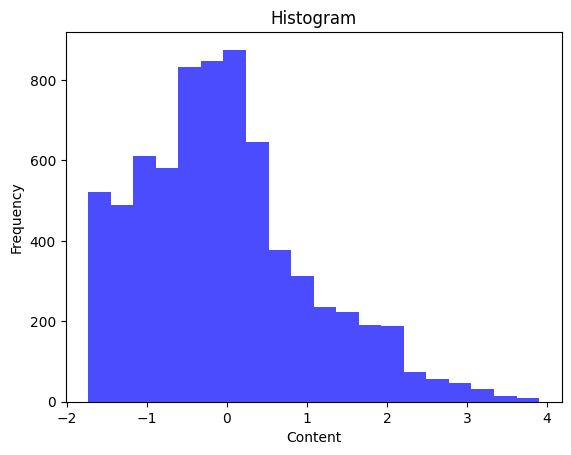

In [52]:
#BEGIN[Matplotlib documentation][https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py]"How to make histograms in Matplotlib"

# Plot histogram
plt.hist(df["content"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Content')
plt.ylabel('Frequency')
plt.title('Histogram for Content')
plt.show()

#END[Matplotlib docmunetation]


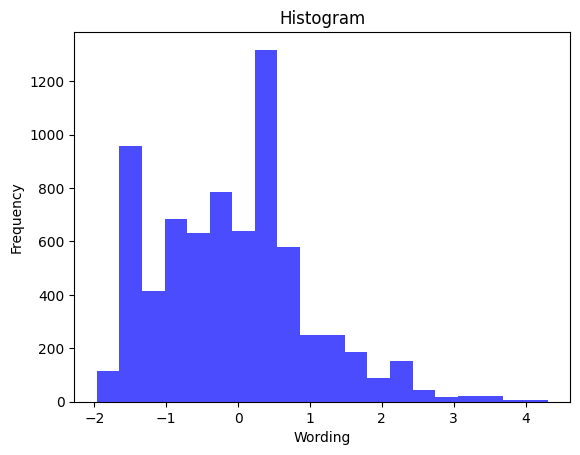

In [53]:
plt.hist(df["wording"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title('Histogram for Wording')
plt.show()

In [55]:
contentMean = df["content"].mean()
contentDeviation = df["content"].std()
print(f"Mean of content is : {contentMean} and the standard deviation is {contentDeviation}")

Mean of content is : -0.014852963999488676 and the standard deviation is 1.0435693830622939


In [56]:
wordingMean = df["wording"].mean()
wordingDeviation = df["wording"].std()
print(f"Mean of wording is : {wordingMean} and the standard deviation is {wordingDeviation}")

Mean of wording is : -0.06307182089297687 and the standard deviation is 1.0360481418751637


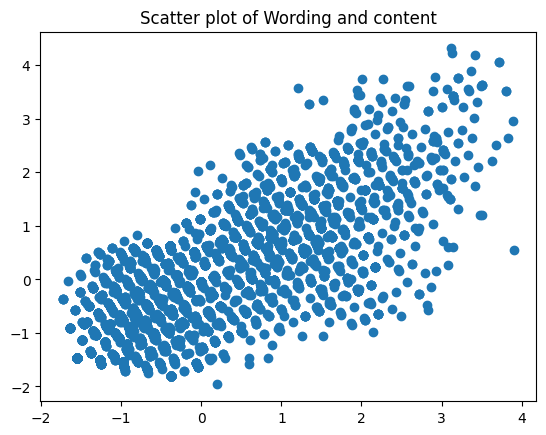

In [58]:
#  Scatter plot between content and wording score
plt.scatter(df["content"], df["wording"])
plt.title("Scatter plot of Wording and content")
plt.show()
# The scatter plot between content and wording score clearly indicates that there is a positive correlation between the two variables

The scatter plot clearly indicates that there is a positive correlation between content and wording

In [61]:
# The corrlation between the content score and the wording score of the summary is 0.75
correlation = df["content"].corr(df["wording"])
print(f" The correlation between content and wording is {correlation}")

 The correlation between content and wording is 0.7513804859701969


In [63]:
rangeStartContent = min(df["content"])
rangeEndContent = max(df["content"])
print(f"The range of the content values is {(rangeStartContent, rangeEndContent)}")

The range of the content values is (-1.72985945253881, 3.90032610436019)


In [64]:
rangeStartWording = min(df["wording"])
rangeEndWording = max(df["wording"])
print(f"The range of the wording values is {(rangeStartWording, rangeEndWording)}")

The range of the wording values is (-1.96261379376134, 4.3106931513921)


In [65]:
uniquePromptsId=list(prompts_train["prompt_id"])
(uniquePromptsId)

['39c16e', '3b9047', '814d6b', 'ebad26']

In [66]:
uniquePromptTitles = list(prompts_train["prompt_title"])
uniquePromptTitles

['On Tragedy',
 'Egyptian Social Structure',
 'The Third Wave',
 'Excerpt from The Jungle']

Drawing

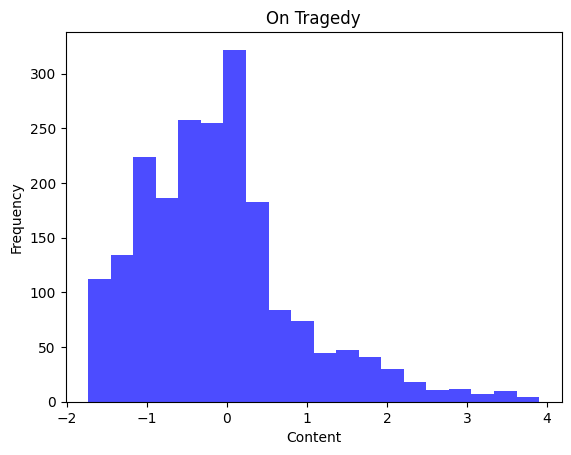

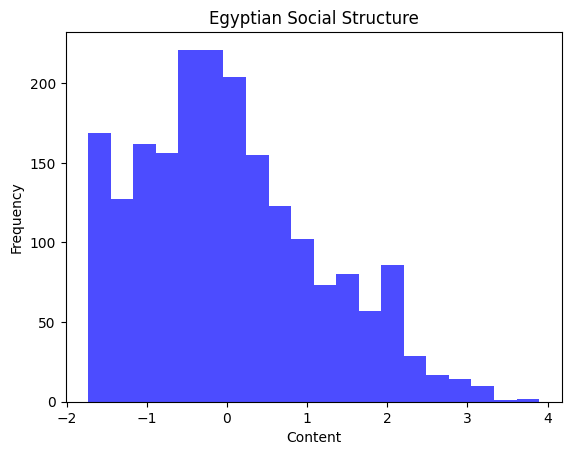

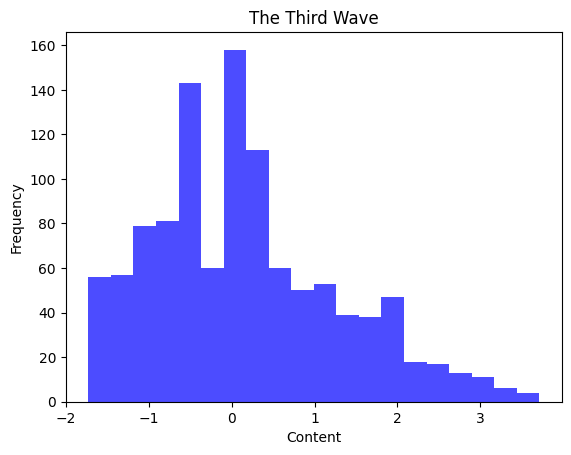

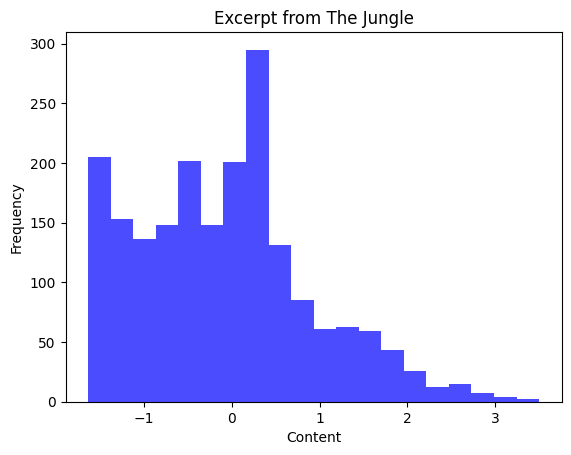

In [69]:
for i in range(len(prompts_train)):
  plt.hist(df.loc[df["prompt_id"]==uniquePromptsId[i]]["content"], bins=20, color='blue', alpha=0.7)
  plt.xlabel('Content')
  plt.ylabel('Frequency')
  plt.title(uniquePromptTitles[i])
  plt.show()

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)** ##

 I personally feel that most of the summaries would have common words like "a", "the", "and",etc. These words would be the most popular in most summaries regardless of their content or wording score. I have therefore made the decision of removing the stop words before calculating the most common words in good and bad essays.


In [111]:
import nltk

#  Implementation help https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    new_text = " ".join(words)
    return (new_text)


additionalFeatures['cleanedText'] = df['text'].apply(remove_stopwords)
additionalFeatures


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,fleschReadingEase,daleChallReadabilityScore,difficultWords,adjectives,textLetters,similarity,cleanedText
0,55.95,7.76,11,5,255,0.414777,third wave experimentto see people reacted new...
1,56.76,8.24,36,6,850,0.714402,Third Wave developed rapidly students genuinly...
2,67.76,8.71,12,1,238,0.513356,third wave started experiment within class slo...
3,45.80,8.84,13,4,308,0.670896,experimen orginally even terrible thngs happen...
4,74.69,7.81,5,4,102,0.450628,third wave developed quickly due students part...
...,...,...,...,...,...,...,...
7160,46.44,10.54,9,3,120,0.278090,"made complex storyline, plot makes audience fe..."
7161,57.95,9.34,7,2,102,0.335654,Aristotle descirbes ideal tradgedy one complex...
7162,87.01,6.30,3,4,78,0.317723,tragedy complex plan simple one.A good plot pl...
7163,46.47,9.92,15,9,207,0.524103,Aristotle believed ideal tradegy include purga...


Now to find the most common words in good and bad summaries, I will segregate the summaries based on the content and wording score. All summaries with BOTH content and wording > their respective mean values are classified as good summaries and all with BOTH content and wording < their respective mean values are classifies as bad summaries.

In [72]:
goodSummaries = df.loc[df["content"] > contentMean]

goodSummaries = goodSummaries.loc[goodSummaries["wording"] > wordingMean]
print(len(goodSummaries))
goodSummaries["cleanedText"]= goodSummaries["text"].apply(remove_stopwords)
goodSummaries

2480


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,cleanedText
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,third wave experimentto see people reacted new...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,Third Wave developed rapidly students genuinly...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,third wave started experiment within class slo...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,experimen orginally even terrible thngs happen...
5,014e2395b3c4,814d6b,The Thrid Wave movement in the school has more...,1.376083,2.389443,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,Thrid Wave movement school students join perio...
...,...,...,...,...,...,...,...,...,...
7140,fca51c5e9f08,39c16e,There are three crucial elements of an ideal t...,0.205683,0.380538,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,"three crucial elements ideal tragedy. First, c..."
7143,fd092f32e1de,39c16e,An ideal tradgedy has to have a simple plot an...,1.173453,0.752157,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,ideal tradgedy simple plot end downfall main c...
7150,fe0824cee95c,39c16e,The first element of tragedy is having a chara...,0.205683,0.380538,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,first element tragedy character relate everyon...
7155,fea2b9408690,39c16e,The three elements for an ideal tragedy Is a C...,-0.002466,-0.045439,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,three elements ideal tragedy Character neither...


In [73]:
badSummaries = df.loc[df["content"] < contentMean]
badSummaries = badSummaries.loc[badSummaries["wording"] < wordingMean]
print(len(badSummaries))
badSummaries["cleanedText"]= badSummaries["text"].apply(remove_stopwords)
badSummaries

2808


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,cleanedText
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,third wave developed quickly due students part...
7,026adb5ec602,814d6b,The thrid wave is a sumbol of strengtht and is...,-1.065590,-0.202142,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,thrid wave sumbol strengtht one central points...
8,03a1a8864b4b,814d6b,the class began to take the Third Wave to seri...,-1.264214,-1.505073,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,class began take Third Wave seriously stopped ...
14,04bfd8aac075,814d6b,The Third Wave was developed by Jones who proc...,-0.072284,-1.554745,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,Third Wave developed Jones proceeded enforce s...
16,0500cdcba2cf,814d6b,it develpoed because people conform to a crowd...,-0.970237,-0.417058,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,develpoed people conform crowd. usually nobody...
...,...,...,...,...,...,...,...,...,...
7159,fecc1ae4e10b,39c16e,A ideal tragedy should have a complex not simp...,-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,"ideal tragedy complex simple plan, moreover im..."
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,"made complex storyline, plot makes audience fe..."
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,Aristotle descirbes ideal tradgedy one complex...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,tragedy complex plan simple one.A good plot pl...


Counting the frequencies of all words in the good summaries

In [74]:
from collections import Counter

#  Punctuation marks to be removed
punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

goodText = ""

for i in range(len(goodSummaries)):
  summary = goodSummaries.iloc[i]["cleanedText"]

  #  Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  goodText += ''.join(summary).lower()

goodFreq= Counter(goodText.split())


Counting the frequencies of all words in the bad summaries

In [75]:
badText = ""

for i in range(len(badSummaries)):
  summary = badSummaries.iloc[i]["cleanedText"]

  # Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  badText += ''.join(summary).lower()


badFreq= Counter(badText.split())


To indicate words associated with good and bad summaries, we make a dictionary of distinguishing words. The words in the good section will occur more times in good summaries than in bad summaries and vice versa for the bad ones.

In [88]:

# If the freq of a word is more in the good summaries than in the bad ones,
# then the word has been added to the good part in the distinguished words and vice versa for the bad ones

distinguishingWords = {
    'good': {word: freq for word, freq in goodFreq.items() if freq > badFreq.get(word, 0)},
    'bad': {word: freq for word, freq in badFreq.items() if freq > goodFreq.get(word, 0)}
}

The list of good words we have derived will have a lot of words with very low frequencies. These words would not be able to indicate which words actually have an impact on the score of the summary. To get the words over represented in the good summaries, I have calculated the mean and the standard deviation of all the frequencies in the good and bad words dictionary. I have only selected the words with frequency > mean + 2 standard deviations for good and bad words. This would help me indicate the words that occur in good and bad summaries in the highest amount.

These would help me show a sufficient amount of over represented words in both types of summaries.

In [101]:

goodWordMean = sum(list(distinguishingWords["good"].values()))/len(distinguishingWords["good"])
goodFreqStdDev= np.std(list(distinguishingWords["good"].values()))

goodWords= {}

for word,freq in distinguishingWords["good"].items():
  if (freq > goodWordMean + 2*goodFreqStdDev):
    goodWords[word]=freq

goodWords = goodWords.keys()

print(f" The words over represented in the good summaries are : \n{goodWords}")

 The words over represented in the good summaries are : 
dict_keys(['third', 'wave', 'people', 'one', 'government', 'wanted', 'things', 'students', 'follow', 'power', 'many', 'got', 'developed', 'believed', 'experiment', 'became', 'ended', 'movement', 'class', 'three', 'school', 'two', 'day', 'would', 'jones', 'something', 'could', 'started', 'even', 'another', 'rules', 'control', 'the', 'called', 'end', 'period', 'time', 'involved', 'felt', 'much', 'project', 'short', 'told', 'part', 'ending', 'feel', 'get', 'everyone', 'also', 'made', 'way', 'getting', 'person', 'well', 'change', 'kept', 'it', 'found', 'like', 'go', 'group', 'put', 'fear', 'worked', 'first', 'social', 'important', 'paragraph', '3', 'second', 'sense', 'bad', 'used', 'example', '2', 'shows', 'take', 'states', 'text', 'simple', 'right', 'single', 'society', 'human', 'system', 'classes', 'them', 'different', 'whole', 'use', 'says', 'next', 'work', 'make', 'order', 'form', 'main', 'rather', 'hold', 'good', 'ways', 'often'

In [103]:
badWordMean = sum(list(distinguishingWords["bad"].values()))/len(distinguishingWords["bad"])
badWordStdDev= np.std(list(distinguishingWords["bad"].values()))

badWords= {}

for word,freq in distinguishingWords["bad"].items():
  if (freq > badWordMean + 2*badWordStdDev):
    badWords[word]=freq

print(f"The words that have a disproportionately high frequency in bad summaries are : \n{badWords.keys()}")

The words that have a disproportionately high frequency in bad summaries are : 
dict_keys(['presented', 'huge', 'actions', 'else', 'rub', 'custom', 'whenever', 'chop', 'flyers', 'sawdust', 'piles', 'rooms', 'run', 'bread', 'mix', 'pig', 'sausagewould', 'free', 'saved', 'moved', 'schools', 'boys', 'osiris', 'died', 'buried', 'tombs', 'associated', 'arranged', 'complex', 'plan', 'catastrophe', 'imitate', 'excite', 'moreover', 'distinctive', 'mark', 'virtuous', 'prosperity', 'feature', 'plainly'])


I will now summarize my approach of getting these words.



1.  Classify summaries as good and bad based on whether their content and wording values are above or below the mean of the content and wording values.
2.  Count the frequencies of words in the good and bad summaries.
3. Make sure that a word is not included in both the good and bad dictionaries by entering the word in a dictionary only if its frequency in a good summary is more than that in the bad one and vice versa.
4. To display overrepresented words, only include words with a frequency of mean + 2*std deviation.



## **Section 5: Three Interesting Plots (Q6, 15 points)**

To come up with plots that revealing something interesting about the data, I had to experiment and play around with values of all the features I have selected so far. This included checking if the features had the same impact on the content and wording scoree as I had expected.

In [ ]:
# Recalculating the length of the summary for the cleaned text after the removal of stop words.
additionalFeatures["textLetters"]= additionalFeatures["cleanedText"].str.len()
# additionalFeatures = additionalFeatures.drop(["cleanedText"],axis=1)
additionalFeatures

In [ ]:
# print(additionalFeatures["daleChallReadabilityScore"].corr(df["content"]))
# additionalFeatures["daleChallReadabilityScore"].corr(df["wording"])

In [ ]:
# print(additionalFeatures["fleschReadingEase"].corr(df["content"]))
# additionalFeatures["fleschReadingEase"].corr(df["wording"])

Trying to identify the metrics with the highest correlation with the content score.

In [ ]:
# print(additionalFeatures["adjectives"].corr(df["content"]))
# additionalFeatures["adjectives"].corr(df["wording"])

**Plot 1**





1.   In question 3's solution, I have mentioned that the reason for me choosing to add difficult words as a parameter was that I expected to see a negative correlation between the number of difficult words per summary and the content and wording score because in my opinion a good summary would be one that is easy to understand and hence would not have too many diffiult words.
2.   But it turns out that I was completely wrong. The correlation between content and number of difficult words is 0.73 which is quite high. The correlation with wording is also 0.5 which is not insignificant.



<!-- 2.   Another metric that revealed something interesting to me was the correlation between the length of the summary and the content score. It is somewhat obvious that a longer summary would summarize the prompt without missing too many details, but 0.79 correlation was way higher than I expected from such a trivial metric. -->






In [ ]:
featureDf= pd.DataFrame()
featureDf["content"] = df["content"]
featureDf["wording"] = df["wording"]
featureDf["difficultWords"] = additionalFeatures["difficultWords"]

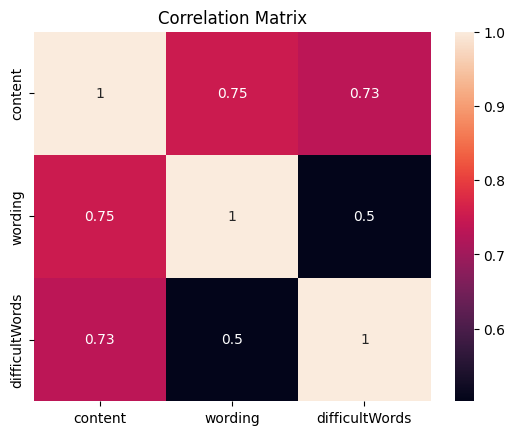

In [116]:
sns.heatmap(featureDf.corr(),annot= True)
plt.title("Correlation Matrix")
plt.show()


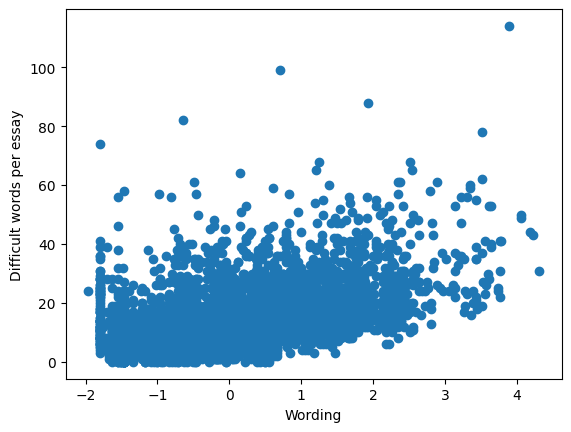

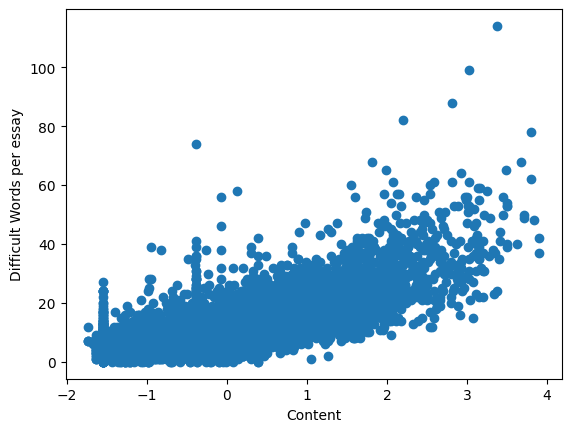

In [117]:

plt.scatter(df["wording"], additionalFeatures["difficultWords"])
plt.xlabel("Wording")
plt.ylabel("Difficult words per essay")
plt.show()


plt.scatter(df["content"], additionalFeatures["difficultWords"])
plt.xlabel("Content")
plt.ylabel("Difficult Words per essay")
plt.show()

The scatter plots also indicate the correlation I have talked about

 **Plot 2**

For the second plot I will try and understand the impact of readability indexes on the content and wording score of the summaries. When considering these featuress during Q3 I expected them to have a considerable impact on the scores of the summaries as these indices rate the summaries based on how easily they can be understood.

For that I will create a new dataframe with the two readability indices that I have calculated for Q3 and the content and wording score.

In [49]:
plot2Df=pd.DataFrame()
plot2Df["fleschReadingEase"]= additionalFeatures["fleschReadingEase"]
plot2Df["daleChallReadabilityScore"]= additionalFeatures["daleChallReadabilityScore"]
plot2Df["content"]= df['content']
plot2Df["wording"]=df["wording"]
plot2Df

,fleschReadingEase,daleChallReadabilityScore,content,wording
0,55.95,7.76,0.205683,0.380538
1,56.76,8.24,3.272894,3.219757
2,67.76,8.71,0.205683,0.380538
3,45.80,8.84,0.567975,0.969062
4,74.69,7.81,-0.910596,-0.081769
...,...,...,...,...
7160,46.44,10.54,-0.981265,-1.548900
7161,57.95,9.34,-0.511077,-1.589115
7162,87.01,6.30,-0.834946,-0.593749
7163,46.47,9.92,-0.157460,-0.165811


As seen in the correlation matrix, the correlation between the content and wording score and the readability indices is almost 0. All correlation between the scores and indices are in the range -0.09 to 0.04. I did not expect this at all. I felt that of the 5 factors I picked in Q3, these 2 indices would have the highest influence on the summary scores but so far it has been the complete opposite.



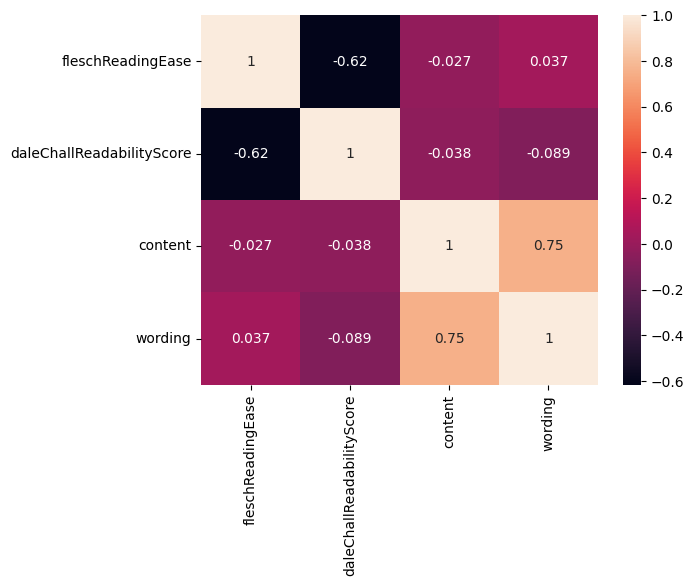

In [50]:
sns.heatmap(plot2Df.corr(),annot=True)
plt.show()

As we see in the scatter plots below, there is no relevant correlation between the readability indices and the content score.

This discovery is actually very helpful as I plan to build a model because I now know that these 2 factors would not add any relevant information for the prediction and hence I will not consider them for the prediction model.

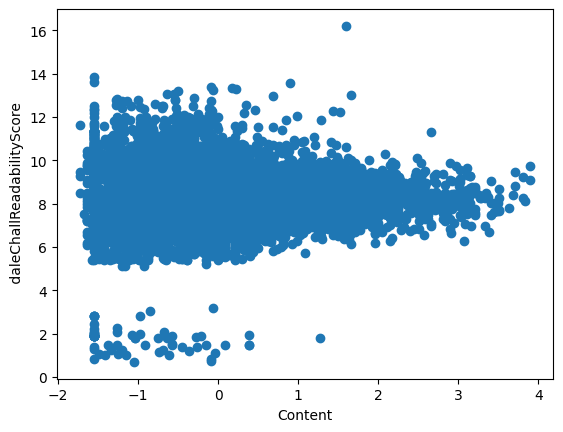

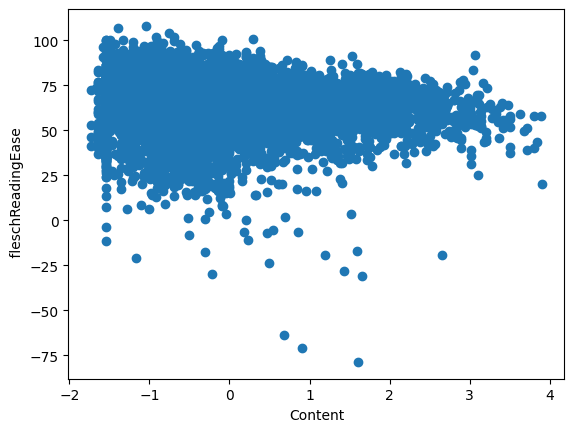

In [51]:
plt.scatter(df["content"], additionalFeatures["daleChallReadabilityScore"])
plt.xlabel("Content")
plt.ylabel(" daleChallReadabilityScore")
plt.show()

plt.scatter(df["content"], additionalFeatures["fleschReadingEase"])
plt.xlabel("Content")
plt.ylabel(" fleschReadingEase")
plt.show()

## **Section 6: Baseline Model (Q7, 10 points)**##


This section is quite self explanatory. I have simply taken the data generated in Q2 and created a linear regression model based on that data.

In [89]:
task2Table


,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle
0,61,601,51,273,23,5,1
1,203,601,138,273,46,9,3
2,60,601,50,273,27,5,1
3,76,601,59,273,35,7,1
4,27,601,25,273,14,5,1
...,...,...,...,...,...,...,...
7160,33,600,30,273,21,0,0
7161,30,600,27,273,18,3,0
7162,29,600,22,273,17,0,0
7163,49,600,35,273,20,2,0


In [90]:
X = task2Table.values
X

array([[ 61, 601,  51, ...,  23,   5,   1],
       [203, 601, 138, ...,  46,   9,   3],
       [ 60, 601,  50, ...,  27,   5,   1],
       ...,
       [ 29, 600,  22, ...,  17,   0,   0],
       [ 49, 600,  35, ...,  20,   2,   0],
       [ 59, 600,  42, ...,  20,   2,   0]])

In [91]:
y1= df["content"]
y2= df["wording"]

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)


contentModel0 = LinearRegression()
contentModel0.fit(X_train, y_train)

y_pred = contentModel0.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for content baseline model:", mse)


Mean Squared Error for content baseline model: 0.33002864547567107


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModel0 = LinearRegression()
wordingModel0.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModel0.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

Mean Squared Error for wording baseline model: 0.5304333728034175




1.   The mean square error for the Content Score model actually seems to be not too bad. A 0.33 error is quite decent considering this is a model made up of very basic input variables
2.   On the other hand, the mean square error for the wording score (0.53) is quite poor. It tells us that the features used are not very indicative of the wording score of the summaries.



## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [ ]:
df

In [ ]:
task2Table

In [ ]:
task2Table["student_id"]= df[ "student_id"]

In [ ]:
additionalFeatures["student_id"]= df["student_id"]
additionalFeatures

In [ ]:
finalDf=additionalFeatures.merge(task2Table, on="student_id")
finalDf

In [ ]:
finalDf["cleanedTextCharLength"]= finalDf["textLetters"]
finalDf

In [ ]:
finalDf=finalDf.drop(["student_id","cleanedText","textLetters","distinctPromptLength"], axis=1)
finalDf

In [ ]:
temp= finalDf.values
print(np.any(temp < 0))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your dataset (features)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(finalDf)
X_scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModelV2 = LinearRegression()
wordingModelV2.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModelV2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModelV2 = LinearRegression()
wordingModelV2.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModelV2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

In [ ]:
X_scaled
print(np.any(X_scaled < 0))

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()

In [ ]:
import numpy as np
import pandas as pd



# Apply log transformation to each variable
transformed_data = np.log(finalDf + 1)  # Adding 1 to handle zero values

# print("Original Data:")
# print(finalDf)
# print("\nTransformed Data:")
# print(transformed_data)
transformed_data

In [ ]:
finalDf

In [ ]:
X = transformed_data.values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):